<a href="https://colab.research.google.com/github/EstebanPerez25/Proyecto-Final-IDM/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

### Libraries

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

## Load data

In [ ]:
df_fe = pd.read_parquet('reservaciones_eda.parquet')

numeric_columns = df_fe.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_fe.select_dtypes(include=['category']).columns
bool_columns = df_fe.select_dtypes(include=['bool']).columns
date_columns = df_fe.select_dtypes(include=['datetime64[ns]']).columns

df_fe.head()

,id_reservaciones,fecha_hoy,fecha_reservacion,fecha_llegada,fecha_salida,numero_personas,numero_personas_anio_anterior,numero_adultos,numero_adultos_anio_anterior,numero_menores,...,nombre_estatus_reservacion,clave_estado,nombre_estado,total_tarifa,id_moneda,fecha_ultimo_cambio,reservacion,reservacion_anio_anterior,id_cliente_disp,cliente_disp_anio_anterior
0,0,2019-08-16,2019-08-16,2019-07-11,2019-10-11,2,0,2,0,0,...,Salida,Emx,México,2659.98,1,2019-10-11,True,False,2,0
1,1,2019-10-22,2019-10-22,2019-01-12,2019-05-12,4,0,4,0,0,...,Salida,Egt,Guanajuato,1764.00,1,2019-05-12,True,False,4,0
2,2,2019-10-28,2019-10-28,2019-01-12,2019-05-12,2,0,2,0,0,...,Salida,Emc,Michoacán,2660.04,1,2019-05-12,True,False,2,0
3,3,2019-10-28,2019-10-28,2019-08-12,2019-11-12,4,0,3,0,0,...,Salida,Egt,Guanajuato,1995.03,1,2019-11-12,True,False,3,0
4,4,2019-10-28,2019-10-28,2019-08-12,2019-12-12,2,0,2,0,0,...,Salida,Emx,México,13369.92,1,2019-12-12,True,False,2,0


In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   id_reservaciones                  203002 non-null  int64         
 1   fecha_hoy                         203002 non-null  datetime64[ns]
 2   fecha_reservacion                 203002 non-null  datetime64[ns]
 3   fecha_llegada                     203000 non-null  datetime64[ns]
 4   fecha_salida                      202968 non-null  datetime64[ns]
 5   numero_personas                   203002 non-null  int64         
 6   numero_personas_anio_anterior     203002 non-null  int64         
 7   numero_adultos                    203002 non-null  int64         
 8   numero_adultos_anio_anterior      203002 non-null  int64         
 9   numero_menores                    203002 non-null  int64         
 10  numero_menores_anio_anterior    

## Feature engineering

### Target Variable: cancelacion

* True: The reservation status is cancelled
* False: Otherwise

In [ ]:
df_fe.nombre_estatus_reservacion.value_counts()

,count
nombre_estatus_reservacion,
Salida,131069
Reservacion Cancelada,33301
Rooming List,18880
Reservacion O (r)registro,17158
No Show,1854
Reservacion En Transicion,586
En Casa (registro),130
Preregistro,24


In [ ]:
df_fe['cancelacion'] = df_fe['nombre_estatus_reservacion'].apply(lambda x: True if x == 'Reservacion Cancelada' else False)

### Days in advance

Days between `fecha_reservacion` y `fecha_llegada`

In [ ]:
df_fe['dias_anticipacion'] = (df_fe['fecha_llegada'] - df_fe['fecha_reservacion']).dt.days

In [ ]:
df_fe.dias_anticipacion.describe()

,dias_anticipacion
count,203000.000000
mean,65.523232
std,137.621586
min,-334.000000
25%,0.000000
50%,49.000000
75%,142.000000
max,740.000000


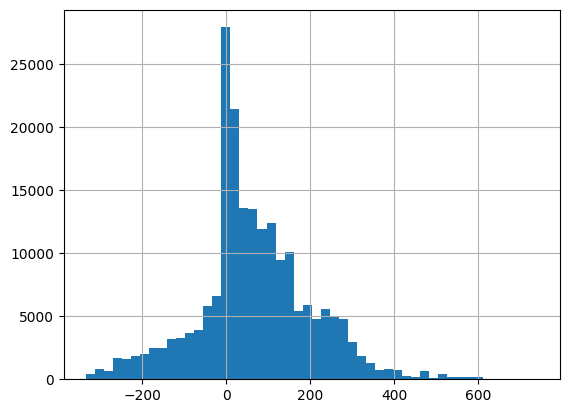

In [ ]:
df_fe.dias_anticipacion.hist(bins=50);

**Encodings**

**Description of categorical variables**

In [ ]:
df_fe[categorical_columns].describe()

,nombre_programa,nombre_paquete,nombre_segmento,nombre_agencia,ciudad_agencia,entidad_federativa_agencia,pais_agencia,nombre_empresa,nombre_tipo_habitacion,clasificacion_tipo_habitacion,nombre_canal,nombre_pais_origen,nombre_estatus_reservacion,clave_estado,nombre_estado
count,203002,203002,203002,203002,203002,203002,203002,203002,203002,202992,203002,203002,203002,203002,203000
unique,2,6,20,112,56,23,5,1,28,11,14,4,8,148,144
top,Ninguno,Walk In,Tour Operators Domestic,Hoteles S.a.,Morelia,Michoacán,México,Hotel 1,Luxury 2q Sn12gsu,Gsu,Lada 800 Nacional68,Mexico,Salida,Egr,Guerrero
freq,202510,117658,73098,42342,60055,62725,192788,203002,52796,80304,82255,201504,131069,62426,62426


**1. One Hot Encoding** (Low cardinality)

* `nombre_programa`
* `nombre_paquete	`
* `nombre_segmento`
* `nombre_canal`
* `nombre_pais_origen`
* `nombre_estatus_reservacion`
* `pais_agencia`
* `clasificacion_tipo_habitacion`

**2. Target Encoding** (High Cardinality)
* `nombre_agencia`
* `ciudad_agencia`
* `entidad_federativa_agencia`
* `nombre_estado`


**3. Drop name_column and keep id_column or other column (label_encoding)**
* `clave_estado`
* `nombre_empresa` (only 1 value, just drop)




### 1. One Hot Encoding

In [ ]:
df_ohe = df_fe.copy()
ohe_columns = ["nombre_programa",
                "nombre_paquete",
                "nombre_segmento",
                "nombre_canal",
                "nombre_pais_origen",
                "nombre_estatus_reservacion",
                "pais_agencia",
                "clasificacion_tipo_habitacion"]

df_ohe = pd.get_dummies(df_fe, columns=ohe_columns, drop_first=True)

### 2. Target Encoding

For each category of the categorical variable, you calculate the mean of the binary target (i.e., the proportion of positive cases, for example, cancellations = True).

This mean is used to code all rows with that category.

For example, if agency "Agency A" has a 30% cancellation rate, all rows with that agency are coded as 0.3.

***Ignoring data leakage risk for using the entire dataset.***

In [ ]:
df_te = df_ohe.copy()

te_columns = ["nombre_agencia",
              "ciudad_agencia",
              "entidad_federativa_agencia",
              "nombre_estado"]

for col in te_columns:
  encoder = TargetEncoder(cols=[col], smoothing=3)
  encoder.fit(df_te[col], df_te['cancelacion'])
  df_te[col + '_te'] = encoder.transform(df_te[col])
  df_te.drop(col, axis=1, inplace=True)

df_te.head()

,id_reservaciones,fecha_hoy,fecha_reservacion,fecha_llegada,fecha_salida,numero_personas,numero_personas_anio_anterior,numero_adultos,numero_adultos_anio_anterior,numero_menores,...,clasificacion_tipo_habitacion_Ast,clasificacion_tipo_habitacion_Gms,clasificacion_tipo_habitacion_Gsp,clasificacion_tipo_habitacion_Gsu,clasificacion_tipo_habitacion_Mjs,clasificacion_tipo_habitacion_Mst,nombre_agencia_te,ciudad_agencia_te,entidad_federativa_agencia_te,nombre_estado_te
0,0,2019-08-16,2019-08-16,2019-07-11,2019-10-11,2,0,2,0,0,...,False,False,False,False,False,True,0.214161,0.265707,0.230249,0.122216
1,1,2019-10-22,2019-10-22,2019-01-12,2019-05-12,4,0,4,0,0,...,False,False,False,False,False,True,0.214161,0.265707,0.230249,0.063040
2,2,2019-10-28,2019-10-28,2019-01-12,2019-05-12,2,0,2,0,0,...,False,False,False,False,True,False,0.214161,0.265707,0.230249,0.048726
3,3,2019-10-28,2019-10-28,2019-08-12,2019-11-12,4,0,3,0,0,...,False,False,False,False,True,False,0.214161,0.265707,0.230249,0.063040
4,4,2019-10-28,2019-10-28,2019-08-12,2019-12-12,2,0,2,0,0,...,False,False,False,True,False,False,0.263111,0.226333,0.219870,0.122216


### 3. Drop columns


In [ ]:
df_dc = df_te.copy()

drop_columns = ['clave_estado', 'nombre_empresa', 'nombre_tipo_habitacion']

df_dc = df_dc.drop(drop_columns, axis=1)

**Scaling**

### Scaling numeric variables

* Robust Scaling: For handling outliers
* MinMax Scaler: For having a range between 0 and 1.
* Standard Scaler: When the variable has a normal distribution.

In [ ]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Columns: 102 entries, id_reservaciones to nombre_estado_te
dtypes: bool(66), datetime64[ns](5), float64(7), int64(24)
memory usage: 68.5 MB


In [ ]:
df_sc = df_dc.copy()
numeric_columns = df_sc.select_dtypes(include=['int64', 'float64']).columns

df_sc[numeric_columns] = RobustScaler().fit_transform(df_sc[numeric_columns])

df_sc.describe()

,id_reservaciones,fecha_hoy,fecha_reservacion,fecha_llegada,fecha_salida,numero_personas,numero_personas_anio_anterior,numero_adultos,numero_adultos_anio_anterior,numero_menores,...,total_tarifa,id_moneda,fecha_ultimo_cambio,id_cliente_disp,cliente_disp_anio_anterior,dias_anticipacion,nombre_agencia_te,ciudad_agencia_te,entidad_federativa_agencia_te,nombre_estado_te
count,2.030020e+05,203002,203002,203000,202968,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,...,203002.000000,203002.0,202505,203002.000000,203002.000000,203000.000000,203002.000000,203002.000000,203002.000000,203002.000000
mean,1.120056e-16,2020-02-26 00:45:45.620239872,2019-08-28 09:57:46.712643072,2019-11-01 22:33:56.855172352,2019-11-08 17:20:49.804895232,0.092933,0.585275,0.047354,0.539847,0.034108,...,0.540928,0.0,2019-10-08 05:21:16.324041728,0.047354,0.539847,0.116361,-0.136204,-0.191515,-0.102496,0.301137
min,-1.000000e+00,2019-01-02 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-03 00:00:00,-0.500000,0.000000,-0.500000,0.000000,0.000000,...,-4.071391,0.0,2019-01-02 00:00:00,-0.500000,0.000000,-2.697183,-1.309202,-1.432964,-1.342847,-0.229686
25%,-5.000000e-01,2019-08-03 00:00:00,2019-04-16 00:00:00,2019-06-07 00:00:00,2019-06-13 00:00:00,-0.500000,0.000000,-0.500000,0.000000,0.000000,...,0.000000,0.0,2019-06-04 00:00:00,-0.500000,0.000000,-0.345070,-0.777748,-0.719871,-0.601829,-0.072261
50%,0.000000e+00,2020-02-25 00:00:00,2019-08-03 00:00:00,2019-10-05 00:00:00,2019-10-13 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,2019-09-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000e-01,2020-08-16 00:00:00,2019-12-27 00:00:00,2020-03-09 00:00:00,2020-03-16 00:00:00,0.500000,1.000000,0.500000,1.000000,0.000000,...,1.000000,0.0,2020-01-30 00:00:00,0.500000,1.000000,0.654930,0.222252,0.280129,0.398171,0.927739
max,1.000000e+00,2021-12-03 00:00:00,2020-12-04 00:00:00,2021-12-06 00:00:00,2021-12-06 00:00:00,15.500000,16.000000,7.000000,7.500000,15.000000,...,136.071654,0.0,2020-12-07 00:00:00,7.000000,7.500000,4.866197,3.115129,2.776475,2.862459,1.963234
std,5.773545e-01,NaN,NaN,NaN,NaN,0.684814,0.684036,0.603538,0.602347,0.265187,...,0.856389,0.0,NaN,0.603538,0.602347,0.969166,0.635548,0.586306,0.467295,0.467171


### Drop Null records

In [27]:
df_sc.isnull().sum().sum()

np.int64(545)

Drop because these records have no usefull information, and it is a low amount.

In [28]:
df_d = df_sc.dropna()
df_d.isnull().sum().sum()

np.int64(0)

### Save features table

In [29]:
# prompt: guardar df_sc en parquet file
df_d.to_parquet('reservaciones_features.parquet')

In [31]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202493 entries, 0 to 203001
Columns: 102 entries, id_reservaciones to nombre_estado_te
dtypes: bool(66), datetime64[ns](5), float64(31)
memory usage: 69.9 MB
